
1 Aufgabe: Modellierung von Hauspreisen mit und ohne Ausreißer
Ziel: Entwickle Modelle zur Vorhersage der Hauspreise (Spalte  MEDV ) im Boston
Housing Dataset. Vergleiche die Leistung der Modelle, wenn sie mit und ohne Ausreißer
trainiert wurden.




Schritte:
1. Datensatz vorbereiten:
Lade den Boston Housing Datensatz.
from sklearn.datasets import fetch_openml 
# Boston Housing Dataset laden 
boston = fetch_openml(name='boston', as_frame=True)
Überprüfe die grundlegenden Eigenschaften des Datensatzes (z. B.
describe()  usw.).

In [77]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Warnungen ausblenden



In [78]:
boston = fetch_openml(name='boston', as_frame=True)
type(boston)

sklearn.utils._bunch.Bunch

In [79]:
df = boston.frame 
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [80]:
df.isna().sum() #Nan werte finden

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [81]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [82]:
df[['CHAS', 'RAD']] = df[['CHAS', 'RAD']].astype(float) # Typeveränderung


In [83]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [85]:
df['CHAS'].unique() # Überpüfung der kategorischen Spalten

array([0., 1.])

In [86]:
df['RAD'].unique() # Überpüfung der kategorischen Spalten

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [87]:
# Überprüfung der Korrelation anderen Variablen  mit der Zielvariable 'MEDV'
correlation= df.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

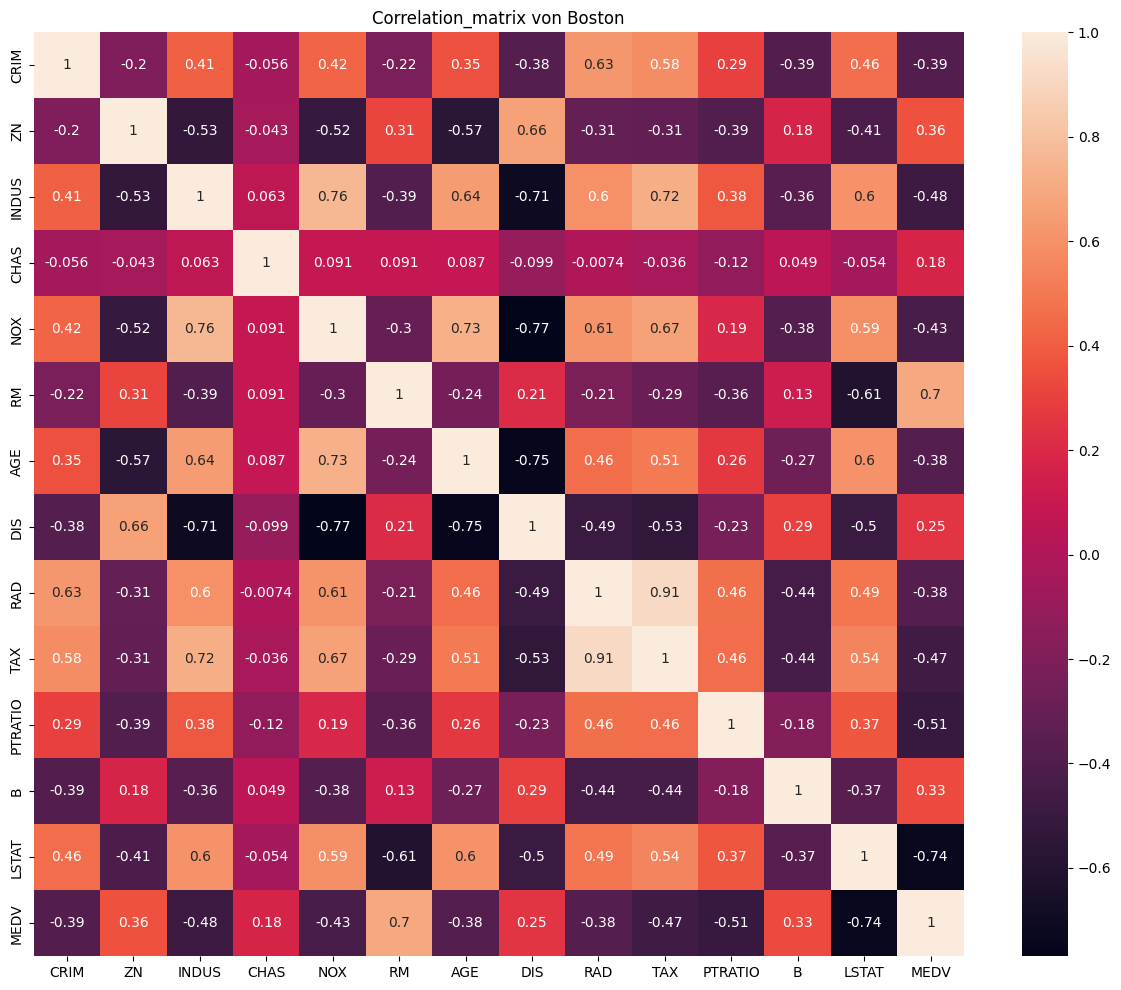

In [88]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.title('Correlation_matrix von Boston')
plt.show()


2. Erkennung von Ausreißern:
Identifiziere potenzielle Ausreißer in der Spalte  MEDV  (Hauspreise).Nutze statistische Methoden wie die IQR-Methode (Interquartilsabstand)
oder/und visuelle Methoden wie Boxplots, um die Ausreißer zu
identifizieren.

In [89]:
#Erkennung von potenzielle Ausreißer mit der IQR-Methode:
Q1 = df['MEDV'].quantile(0.25) # Quartil 1
Q3 = df['MEDV'].quantile(0.75) # Quartil 2
IQR = Q3 - Q1 #Interquartilabstand
untere_grenze= Q1 - 1.5 * IQR
obere_grenze = Q3 + 1.5 * IQR
ausreisser= df['MEDV'][(df['MEDV'] < untere_grenze) | (df['MEDV'] > obere_grenze)] # Ausreisser auswählen
print(len(ausreisser))
ausreisser

40


97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: MEDV, dtype: float64

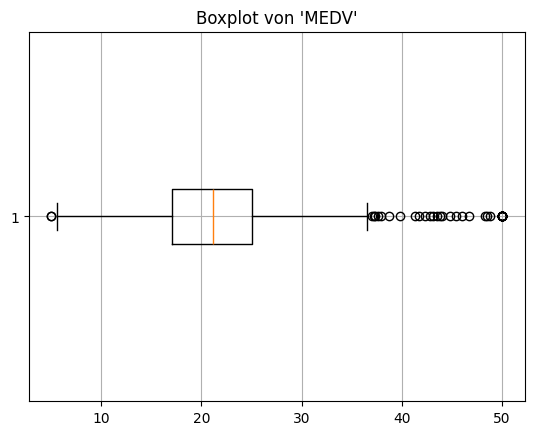

In [ ]:

plt.boxplot(df['MEDV'], vert=False)
plt.title("Boxplot von 'MEDV'")
plt.grid()
plt.show()


3. Entfernung von Ausreißern:
Erstelle zwei separate Datensätze: einen mit Ausreißern und einen ohne.

In [91]:
df_mit_ausreisser= df.copy()

df_ohne_ausreisser = df[(df['MEDV'] > untere_grenze) & (df['MEDV'] < obere_grenze)]

print(f' Mit ausreisser:{df_mit_ausreisser.shape}\nOhne:{df_ohne_ausreisser.shape}')



 Mit ausreisser:(506, 14)
Ohne:(466, 14)


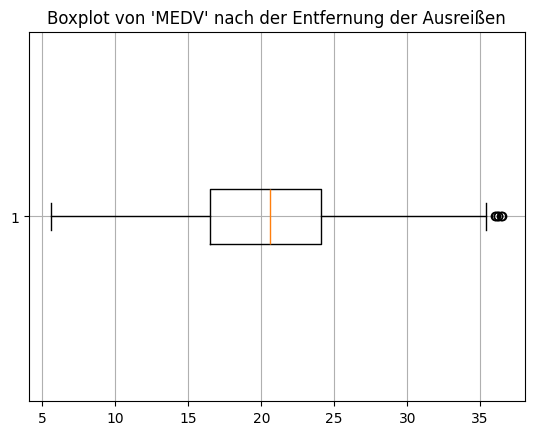

In [108]:
# Visulation nach der Entfernung der Ausreißen
import matplotlib.pyplot as plt

plt.boxplot(df_ohne_ausreisser['MEDV'], vert=False)
plt.title("Boxplot von 'MEDV' nach der Entfernung der Ausreißen")
plt.grid()
plt.show()

4. Datenaufteilung:
Teile beide Datensätze in Trainings- und Testdaten auf (z. B. 80% Training,
20% Test)

In [93]:
# Mit Ausreissern
X1=df_mit_ausreisser.drop(['MEDV','B'], axis=1)
y1=df_mit_ausreisser['MEDV']

# Ohne Ausreissen
X2=df_ohne_ausreisser.drop(['MEDV','B'], axis=1)
y2=df_ohne_ausreisser['MEDV']

#Aufteilung in Test und Trainingdaten
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# Skalieren der Trainingsdaten - wichtig für SVR model
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)  # nur X1_train skalieren
X2_train = scaler.fit_transform(X2_train)  # nur X2_train skalieren

# Skalieren der Testdaten 
X1_test = scaler.transform(X1_test)
X2_test = scaler.transform(X2_test)



In [94]:
#Überprüfung, ob die Daten korrekt aufgeteilt wurden:
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)

(506, 12) (506,)
(466, 12) (466,)


5. Modellierung:
Trainiere beide Datensätze (mit und ohne Ausreißer) mit linearer Regression,
SVR und einem Entscheidungsbaum für Regression zur Vorhersage von
MEDV .Evaluiere die Modelle anhand des Root Mean Squared Error (RMSE).

In [95]:
# Modelle erstellen und in einer Liste speichern
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor(random_state=42)))
models.append(('SVR', SVR()))
print(models)

[('LR', LinearRegression()), ('DT', DecisionTreeRegressor(random_state=42)), ('SVR', SVR())]


6. Vergleich:
Vergleiche die Modelle mit und ohne Ausreißer hinsichtlich ihrer
Vorhersagequalität.Analysiere, wie sich Ausreißer auf die Modellleistung auswirken.
Merkmale des Boston Housing Dataset
Der Datensatz enthält 506 Beobachtungen (Häuser) und 13 Merkmale sowie eine
Zielvariable ( MEDV ).

In [96]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

results = []
names = []

# Schleife über alle Modelle
for name, model in models:
    # Trainiere das Modell
    model.fit(X1_train, y1_train)

    # Vorhersagen machen
    y_pred = model.predict(X1_test)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y1_test, y_pred))
    results.append(rmse)
    names.append(f"{name} - RMSE")

    # Ausgabe des RMSE-Werts für jedes Modell
    print(f'{name} - RMSE: {round(rmse, 2)}')
    

LR - RMSE: 5.07
DT - RMSE: 3.99
SVR - RMSE: 5.16


In [97]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

results2 = []
names2 = []

# Schleife über alle Modelle
for name, model in models:
    # Trainiere das Modell
    model.fit(X2_train, y2_train)

    # Vorhersagen machen
    y_pred = model.predict(X2_test)

    # RMSE
    rmse = np.sqrt(mean_squared_error(y2_test, y_pred))
    results2.append(rmse)
    names2.append(f"{name} - RMSE")

    # Ausgabe des RMSE-Werts für jedes Modell
    print(f'{name} - RMSE: {round(rmse, 2)}')
    


LR - RMSE: 3.18
DT - RMSE: 3.47
SVR - RMSE: 2.96


In [102]:
from sklearn.model_selection import GridSearchCV
results = []
names = []
results2 = []
names2 = []

print('Die Ergebnisse für Dataframe mit Aussreiser')

# Definieren GridSearchCV für jedes Modell
param_grids = {
    'LR': {},  # Keine Hyperparameter für LinearRegression
    'DT': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'epsilon': [0.01, 0.1, 0.2]
    }
}

# Schleife über alle Modelle und Parameter
for name, model in models:
    print(f"\nModell: {name}")
    
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X1_train, y1_train) # model trainieren
    best_params = grid_search.best_params_
    print(f"Beste Hyperparameter: {best_params}")
    
    y_pred = grid_search.predict(X1_test)  # Testdaten hier einfügen
    rmse = np.sqrt(mean_squared_error(y1_test, y_pred))  # Testdaten hier einfügen
    
    results.append(rmse)
    names.append(f"{name} - RMSE")
    print(f"{name} - RMSE: {round(rmse, 2)}")
    

print('\nDie Ergebnisse für Dataframe ohne Aussreiser')

# Schleife für das zweite Dataframe ohne Ausreißer
for name, model in models:
    print(f"\nModell: {name}")
    
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X2_train, y2_train) 
    best_params = grid_search.best_params_
    print(f"Beste Hyperparameter: {best_params}")

    # Vorhersagen machen
    y_pred2 = grid_search.predict(X2_test)
    
    # Berechne den RMSE
    rmse = np.sqrt(mean_squared_error(y2_test, y_pred2))
    results2.append(rmse)
    
    names2.append(f"{name} - RMSE")
    print(f'{name} - RMSE: {round(rmse, 2)}')

# Auswahl des besten Modells für X1 und X2
best_model_index_X1 = np.argmin(results)  # Index des Modells mit dem niedrigsten RMSE für X1
best_model_index_X2 = np.argmin(results2)  # Index des Modells mit dem niedrigsten RMSE für X2

best_model_X1 = names[best_model_index_X1]  # Name des besten Modells für X1
best_model_X2 = names2[best_model_index_X2]  # Name des besten Modells für X2

print(f'\nBestes Modell für Dataframe mit Aussreiser: {best_model_X1} mit RMSE: {round(results[best_model_index_X1], 2)}')
print(f'Bestes Modell für Dataframe ohne Aussreiser: {best_model_X2} mit RMSE: {round(results2[best_model_index_X2], 2)}')


Die Ergebnisse für Dataframe mit Aussreiser

Modell: LR
Beste Hyperparameter: {}
LR - RMSE: 5.07

Modell: DT
Beste Hyperparameter: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
DT - RMSE: 4.56

Modell: SVR
Beste Hyperparameter: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
SVR - RMSE: 3.87

Die Ergebnisse für Dataframe ohne Aussreiser

Modell: LR
Beste Hyperparameter: {}
LR - RMSE: 3.18

Modell: DT
Beste Hyperparameter: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
DT - RMSE: 3.11

Modell: SVR
Beste Hyperparameter: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
SVR - RMSE: 2.24

Bestes Modell für Dataframe mit Aussreiser: SVR - RMSE mit RMSE: 3.87
Bestes Modell für Dataframe ohne Aussreiser: SVR - RMSE mit RMSE: 2.24


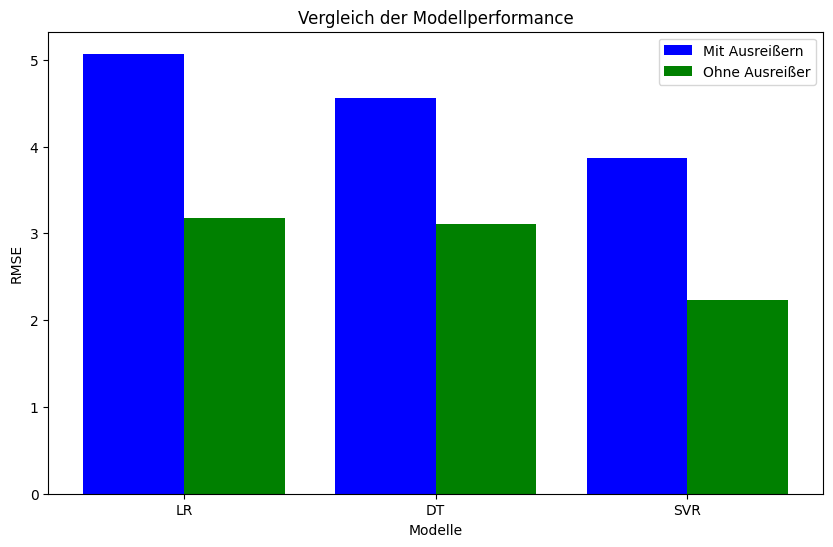

In [106]:
model_names = [name for name, _ in models] 
x = np.arange(len(model_names))  # Positionen für die Balken
width = 0.4  # Breite der Balken

plt.figure(figsize=(10, 6))

# Balken zeichnen
plt.bar(x - width/2, results, width, label='Mit Ausreißern', color='blue')
plt.bar(x + width/2, results2, width, label='Ohne Ausreißer', color='green')

# Achsenbeschriftung
plt.xticks(x, model_names)
plt.xlabel('Modelle')
plt.ylabel('RMSE')
plt.title('Vergleich der Modellperformance')
plt.legend()

plt.show()

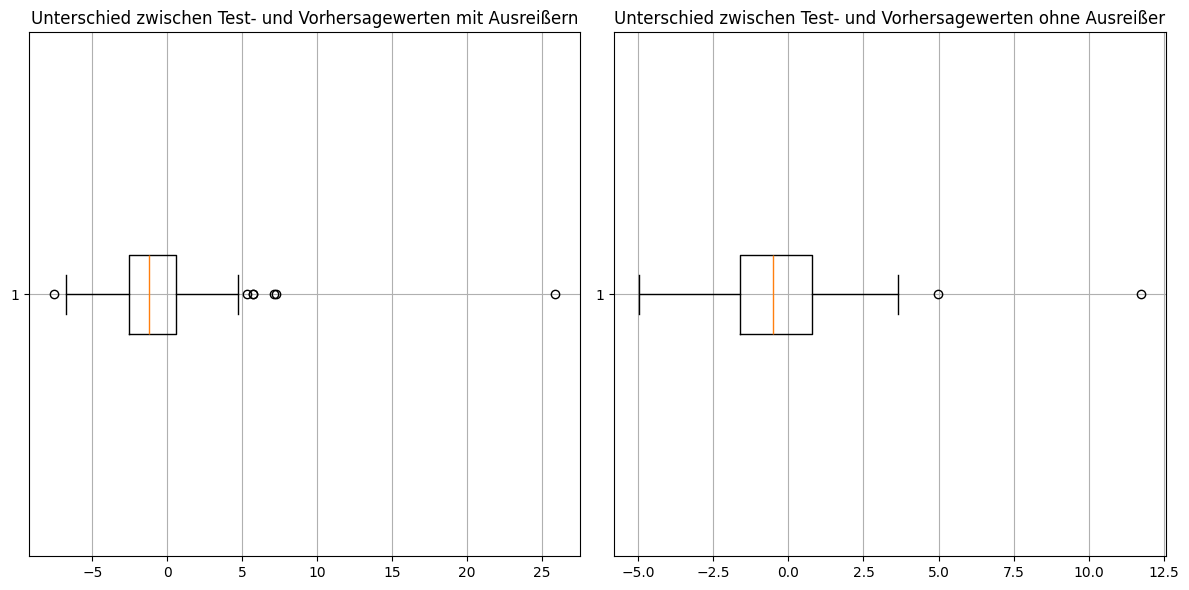

In [115]:
fehler_mit_ausreiser=y1_test-y_pred
fehler_ohne_ausreiser=y2_test-y_pred2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(fehler_mit_ausreiser, vert=False)
plt.title("Unterschied zwischen Test- und Vorhersagewerten mit Ausreißern")
plt.grid()

plt.subplot(1, 2, 2)
plt.boxplot(fehler_ohne_ausreiser, vert=False)
plt.title("Unterschied zwischen Test- und Vorhersagewerten ohne Ausreißer")
plt.grid()

plt.tight_layout()
plt.show()


Merkmale (Features):
1. CRIM: Verbrechensrate pro Kopf nach Stadt.2. ZN: Anteil der Wohngebiete, die für Grundstücke größer als 25.000 Quadratfuß
zoniert sind.3. INDUS: Anteil nicht-gewerblicher Geschäftsflächen pro Stadt.4. CHAS: Dummy-Variable, ob das Grundstück am Charles River liegt (1 = Ja, 0 =
Nein).5. NOX: Konzentration von Stickstoffoxiden (in ppm).6. RM: Durchschnittliche Anzahl der Räume pro Wohneinheit.7. AGE: Anteil der Gebäude, die vor 1940 gebaut wurden (in Prozent).8. DIS: Gewichtete Distanz zu fünf Arbeitszentren in Boston.9. RAD: Index für Erreichbarkeit von Autobahnen.10. TAX: Grundsteuersatz pro $10.000.11. PTRATIO: Verhältnis von Schülern zu Lehrern nach Stadt.12. B: 1000  , wobei   der Anteil der Bevölkerung ist, die Schwarz ist.
(bitte nicht verwenden)13. LSTAT: Prozentsatz der Bevölkerung mit niedrigem sozioökonomischen Status.
Zielvariable:MEDV: Medianwert der Häuserpreise (in $1.000).
(Bk−0.63)2 Bk